# Aviation Accidents Python Analysis
## Project Goal
My project aims to determine whether the aviation business would be a good new venture for the company.
## Data Source
My data comes from [kaggle](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses/data) by the NTSB aviation accident database containing information about civil aviation accidents and selected incidents within the United States and some countries.
## Step 1: Importing libraries and loading Data

In [8]:
# Import data analysis libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from numbers import Number
import seaborn as sns

from warnings import filterwarnings
filterwarnings("ignore")

## Read AviationData.csv.zip into a pandas DataFrame 
   I used pandas to create the DataFrame named `df`, containing the data from the dataset in file AviationData.csv.zip.
## Step 2: Initial Data Exploration

In [24]:
#Read dataset
df = pd.read_csv('./AviationData.csv.zip', encoding = 'latin1')
print(df.head()) # Check the first 5 rows
assert type(df) == pd.DataFrame

         Event.Id Investigation.Type Accident.Number  Event.Date  \
0  20001218X45444           Accident      SEA87LA080  1948-10-24   
1  20001218X45447           Accident      LAX94LA336  1962-07-19   
2  20061025X01555           Accident      NYC07LA005  1974-08-30   
3  20001218X45448           Accident      LAX96LA321  1977-06-19   
4  20041105X01764           Accident      CHI79FA064  1979-08-02   

          Location        Country Latitude Longitude Airport.Code  \
0  MOOSE CREEK, ID  United States      NaN       NaN          NaN   
1   BRIDGEPORT, CA  United States      NaN       NaN          NaN   
2    Saltville, VA  United States  36.9222  -81.8781          NaN   
3       EUREKA, CA  United States      NaN       NaN          NaN   
4       Canton, OH  United States      NaN       NaN          NaN   

  Airport.Name  ... Purpose.of.flight Air.carrier Total.Fatal.Injuries  \
0          NaN  ...          Personal         NaN                  2.0   
1          NaN  ...         

In [25]:
# Checking dataset information and shape
print(df.info()) #Checking basic info
print(df.shape)

#checking total accidents and columns
print(f"Total records: {len(df)}")
print(f"Columns: {df.columns.tolist()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

## Step 3: Data Cleaning
From an overlook of my data some columns are not applicable in our data analysis so dropping those columns would be as start.

In [26]:
#Drop irrelevant columns
columns_to_drop = ['Investigation.Type', 'Accident.Number', 'Report.Status', 'Publication.Date', 'Aircraft.Damage', 'Air.Carrier', 
    'Schedule', 'FAR.Description', 'Registration.Number' ]
df = df.drop(columns=columns_to_drop, errors='ignore')  # Ignore if columns don't exist
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Event.Date              88889 non-null  object 
 2   Location                88837 non-null  object 
 3   Country                 88663 non-null  object 
 4   Latitude                34382 non-null  object 
 5   Longitude               34373 non-null  object 
 6   Airport.Code            50249 non-null  object 
 7   Airport.Name            52790 non-null  object 
 8   Injury.Severity         87889 non-null  object 
 9   Aircraft.damage         85695 non-null  object 
 10  Aircraft.Category       32287 non-null  object 
 11  Make                    88826 non-null  object 
 12  Model                   88797 non-null  object 
 13  Amateur.Built           88787 non-null  object 
 14  Number.of.Engines       82805 non-null

Dropping rows with some critical missing values.

In [39]:
# Drop rows with critical missing values (e.g., no aircraft model or date)
df = df.dropna(subset=['Make', 'Model', 'Event.Date', 'Total.Fatal.Injuries'])

# Fill numerical missing values (e.g., injuries) with 0
df['Total.Fatal.Injuries'] = df['Total.Fatal.Injuries'].fillna(0)
df['Total.Serious.Injuries'] = df['Total.Serious.Injuries'].fillna(0)
print(df.shape)
print(df.info())

(77391, 24)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 77391 entries, 0 to 88888
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                77391 non-null  object 
 1   Event.Date              77391 non-null  object 
 2   Location                77353 non-null  object 
 3   Country                 77176 non-null  object 
 4   Latitude                25094 non-null  object 
 5   Longitude               25095 non-null  object 
 6   Airport.Code            43006 non-null  object 
 7   Airport.Name            45351 non-null  object 
 8   Injury.Severity         76412 non-null  object 
 9   Aircraft.damage         74707 non-null  object 
 10  Aircraft.Category       28540 non-null  object 
 11  Make                    77391 non-null  object 
 12  Model                   77391 non-null  object 
 13  Amateur.Built           77358 non-null  object 
 14  Number.of.Engines       72

In [40]:
# Check for duplicate rows
print(df.duplicated().sum())

22


I am not removing the duplicates because they are not significantly large in the dataset.

Convert `Event.Date` to datetime format for time-based analysis. I will be doing an analysis using this later on.

In [45]:
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')
df = df.dropna(subset=['Event.Date'])  # Drop rows with invalid dates
print(df.shape)

(77391, 24)


In [46]:
# Check cleaned data
print(df.head())
print(f"Remaining records: {len(df)}")
print(f"Missing values per column:\n{df.isnull().sum()}")

         Event.Id Event.Date         Location        Country Latitude  \
0  20001218X45444 1948-10-24  MOOSE CREEK, ID  United States      NaN   
1  20001218X45447 1962-07-19   BRIDGEPORT, CA  United States      NaN   
2  20061025X01555 1974-08-30    Saltville, VA  United States  36.9222   
3  20001218X45448 1977-06-19       EUREKA, CA  United States      NaN   
4  20041105X01764 1979-08-02       Canton, OH  United States      NaN   

  Longitude Airport.Code Airport.Name Injury.Severity Aircraft.damage  ...  \
0       NaN          NaN          NaN        Fatal(2)       Destroyed  ...   
1       NaN          NaN          NaN        Fatal(4)       Destroyed  ...   
2  -81.8781          NaN          NaN        Fatal(3)       Destroyed  ...   
3       NaN          NaN          NaN        Fatal(2)       Destroyed  ...   
4       NaN          NaN          NaN        Fatal(1)       Destroyed  ...   

  Number.of.Engines    Engine.Type Purpose.of.flight Air.carrier  \
0               1.0  Rec

## Step 3: Data Analysis

Now that the data is cleaned, let’s perform Exploratory Data Analysis (EDA) to uncover patterns, trends, and actionable insights for my company's aviation business. We’ll use Pandas, Matplotlib, and Seaborn for analysis and visualizations.

###  1: Total accidents over time
We need to find out the distribution of the accidents as the years progressed, this is to assume that as the technoloogy changed it also applied to the aviation business and could have caused significant differences in number of accidents. This also accounts for 2020 due to COVID having low numbers due to the curfews and regulated or reduced travelling.

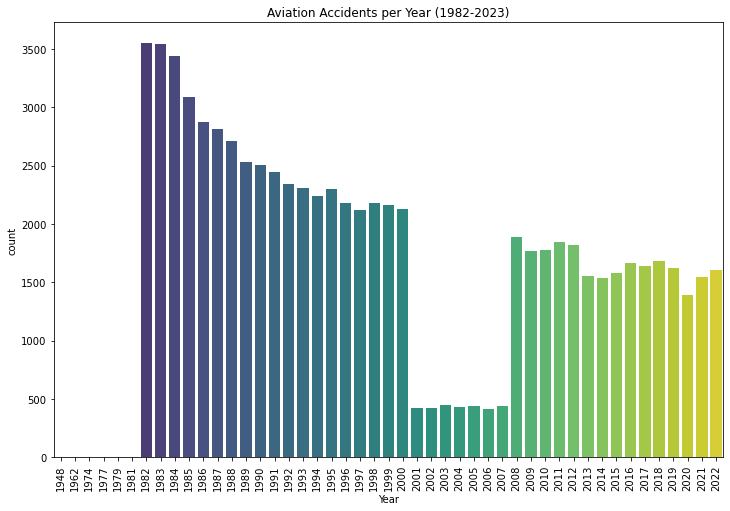

In [49]:
# Extract year from 'Event.Date'
df['Year'] = pd.to_datetime(df['Event.Date']).dt.year

# Plot accidents per year
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Year', palette='viridis')
plt.title('Aviation Accidents per Year (1982-2023)')
plt.xticks(rotation=90)
plt.show()

In 2020 the reductions were low but not as significant aa in the early 2000s.

I am using a pie chart to make a comparison on the severity of fatality in percantage. Did more people die than getting injured.

Create a new column to classify accidents (e.g., fatal vs. non-fatal).

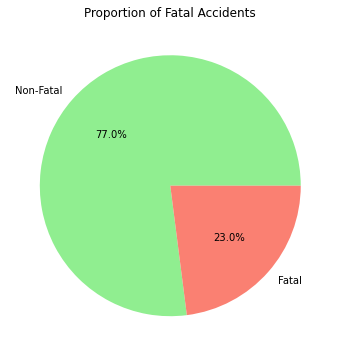

In [54]:
df['Is.Fatal'] = np.where(df['Total.Fatal.Injuries'] > 0, 1, 0)

# Pie chart of fatal vs. non-fatal accidents
fatal_counts = df['Is.Fatal'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(fatal_counts, labels=['Non-Fatal', 'Fatal'], autopct='%1.1f%%', colors=['lightgreen', 'salmon'])
plt.title('Proportion of Fatal Accidents')
plt.show()

## 2: Aircraft-Specific Risk Analysis
### (i). Top 10 Safest Aircraft (Lowest Accident Rates)

In [56]:
# Group by aircraft make/model and count accidents
aircraft_safety = df.groupby(['Make', 'Model']).agg(
    Total_Accidents=('Is.Fatal', 'count'),
    Fatal_Accidents=('Is.Fatal', 'sum')
).reset_index()

# Calculate fatal accident rate
aircraft_safety['Fatal_Rate'] = (aircraft_safety['Fatal_Accidents'] / aircraft_safety['Total_Accidents']) * 100

# Filter aircraft with at least 10 recorded accidents (for statistical significance)
significant_aircraft = aircraft_safety[aircraft_safety['Total_Accidents'] >= 10]

# Top 10 safest (lowest fatal rate)
top10_safest = significant_aircraft.sort_values('Fatal_Rate').head(10)
print(top10_safest)

                    Make   Model  Total_Accidents  Fatal_Accidents  Fatal_Rate
4191       Burkhart Grob    G103               13                0         0.0
12574              PIPER     J5A               10                0         0.0
1941                BELL  OH-58A               14                0         0.0
1910                BELL    47D1               10                0         0.0
4354              CESSNA    172A               10                0         0.0
14337              Raven    S55A               11                0         0.0
4392              CESSNA    180H               23                0         0.0
4393              CESSNA    180J               22                0         0.0
12261     North American   AT-6G               11                0         0.0
11612  Mcdonnell Douglas   MD-80               14                0         0.0


We are identifying the plane models with lower fatalities which will be better for leasing or buying.

### (ii): Top 10 Riskiest Aircraft (Highest Fatal Rates)

In [57]:
# Top 10 riskiest (highest fatal rate)
top10_risky = significant_aircraft.sort_values('Fatal_Rate', ascending=False).head(10)
print(top10_risky)

                 Make     Model  Total_Accidents  Fatal_Accidents  Fatal_Rate
14538        Robinson      R-44               23               18   78.260870
11790      Mitsubishi  MU-2B-60               25               19   76.000000
14137        ROBINSON    R44 II               11                8   72.727273
14546        Robinson  R22 Beta               14               10   71.428571
5461           Cessna       525               10                7   70.000000
12813           PIPER      PA31               20               14   70.000000
724    Aero Commander     680FL               10                7   70.000000
5388           Cessna      310H               10                7   70.000000
10605         Learjet       35A               20               14   70.000000
12793           PIPER      PA25               32               22   68.750000


These are the airplanes prone to higher fatality rate which would reduce customer trust and cost higher for insurance. 

## 3: Accident Causes & Mitigation

### (i):  Most Common Causes of Accidents
Are most accidents due to pilot error, mechanical failure, or weather?

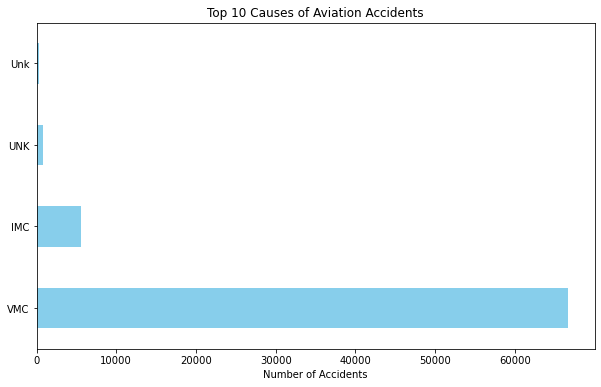

In [60]:
# Plot top 10 accident causes
plt.figure(figsize=(10, 6))
df['Weather.Condition'].value_counts().head(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Causes of Aviation Accidents')
plt.xlabel('Number of Accidents')
plt.show()

### (ii): Weather-Related Accidents

Which months/seasons pose the highest weather risks?

ValueError: min() arg is an empty sequence